In [1]:
import numpy as np
import matplotlib.pyplot as plt

import random

from PIL import Image
from tensorflow.keras.losses import MSE

In [2]:
panda = Image.open("pandas.jpeg")

In [3]:
small = panda.resize((40,40))

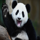

In [4]:
small

In [5]:
img = np.array(small).mean(axis=2)

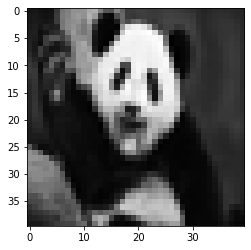

In [6]:
plt.imshow(img,cmap="gray")

In [7]:
original = img.flatten()

In [8]:
population = np.random.randint(0,255,(1000,original.shape[0]))

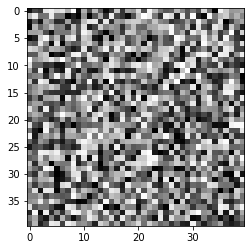

In [9]:
plt.imshow(population[0].reshape(*img.shape),cmap="gray")

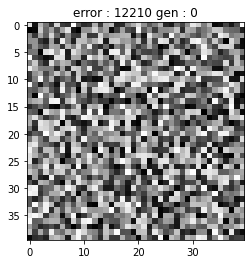

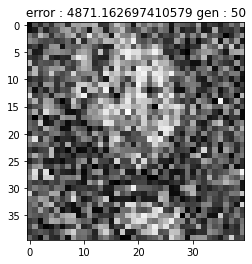

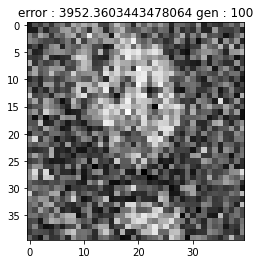

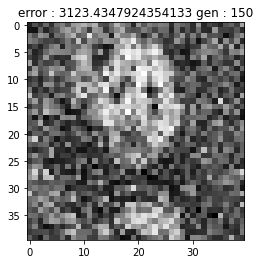

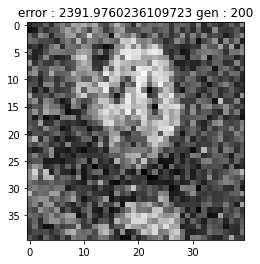

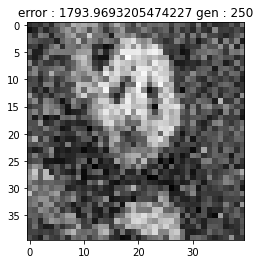

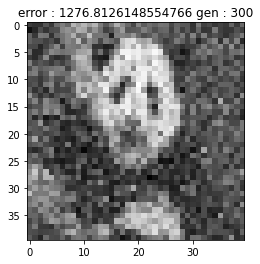

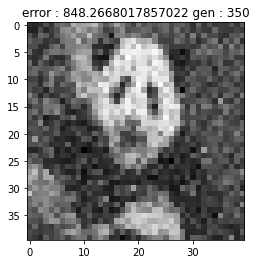

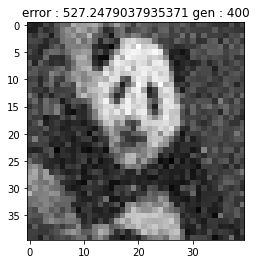

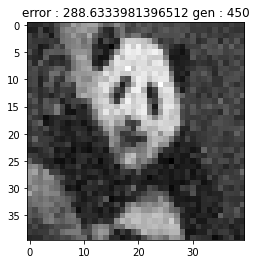

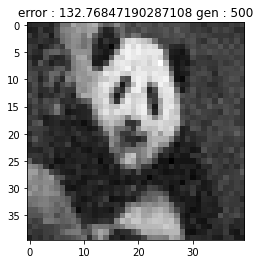

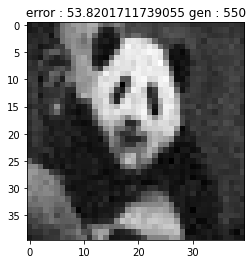

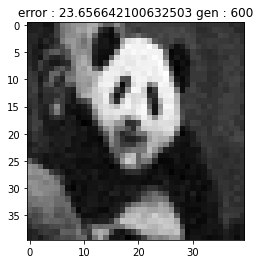

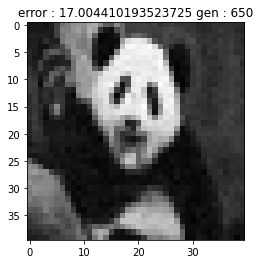

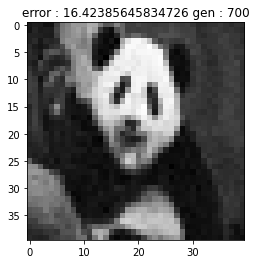

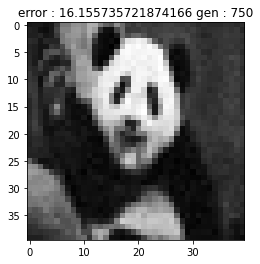

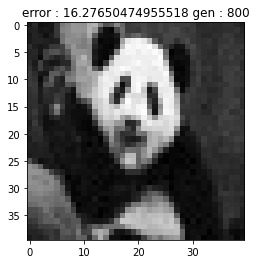

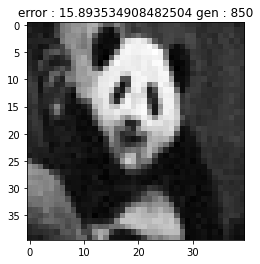

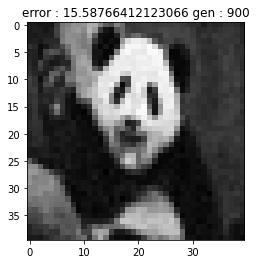

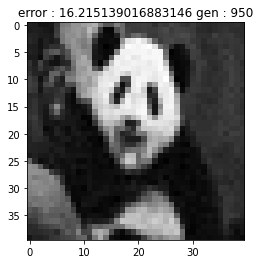

In [10]:
for generation in range(1000):
    error = MSE(original,population).numpy()
    indices = error.argsort()
    fit = population[indices[:10]]
    
    first = fit[np.random.randint(0,10,1000)]
    second = fit[np.random.randint(0,10,1000)]
    
    data = np.stack([first,second],axis=2)
    
    first_selector = np.random.randint(0,2,population.shape)
    second_selector = 1-first_selector
    
    selector = np.stack([first_selector,second_selector],axis=2)
    
    mutation = np.random.randn(*population.shape)
    population = (data*selector).sum(axis=2) + mutation
    
    if generation % 50 == 0:
        plt.figure()
        plt.title(f"error : {error[indices[0]]} gen : {generation}")
        plt.imshow(population[0].reshape(*img.shape),cmap="gray")
        plt.show()